# ASSIGNMENT-4

BHAVYA SRI DUGGINA

TASK-1 Load the dataset

In [725]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [726]:
df=pd.read_csv("C:/Users/91741/Downloads/winequality-red.csv")

In [727]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


TASK-2 Data preprocessing

In [728]:
df.shape

(1599, 12)

In [729]:
df.drop_duplicates(inplace=True)

In [730]:
df.shape

(1359, 12)

In [731]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [733]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

TASK-3 Visualization

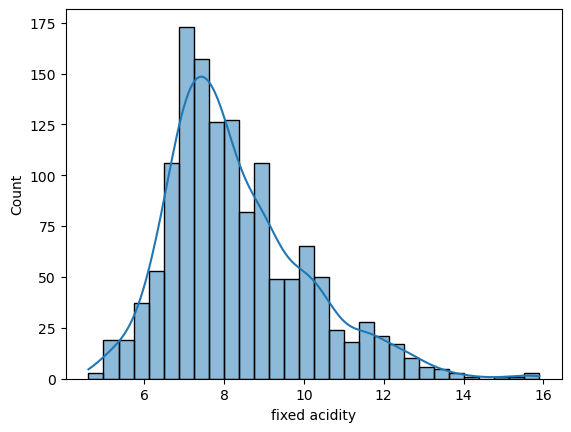

In [734]:
sns.histplot(df["fixed acidity"],kde=True)
plt.show()

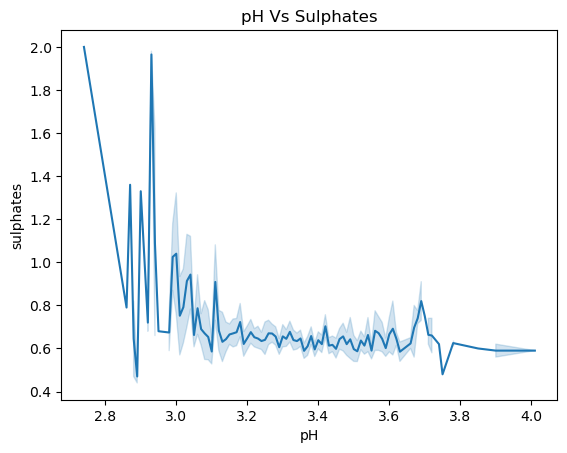

In [735]:
sns.lineplot(x='pH',y='sulphates',data=df)
plt.title("pH Vs Sulphates")
plt.show()

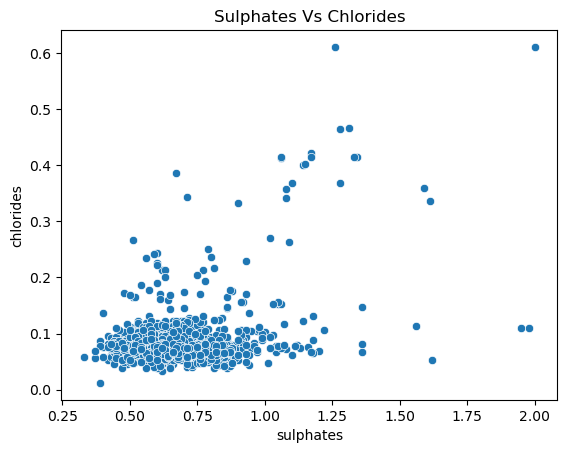

In [736]:
sns.scatterplot(x=df.sulphates,y=df.chlorides)
plt.title("Sulphates Vs Chlorides")
plt.show()

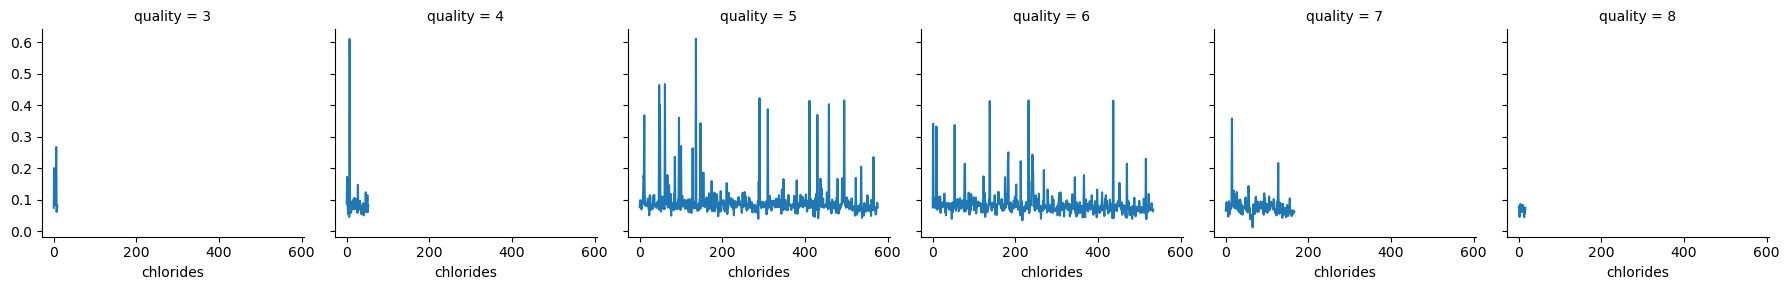

In [737]:
plot = sns.FacetGrid(df, col="quality")
plot.map(plt.plot, "chlorides")
plt.show()

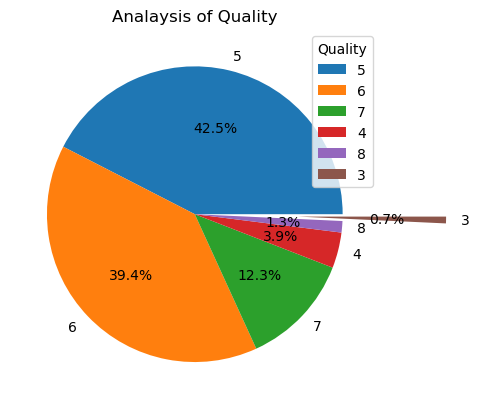

In [738]:
plt.pie(df.quality.value_counts(),labels=df.quality.unique(),explode=[0,0,0,0,0,0.7],autopct="%1.1f%%") 
plt.legend(loc='upper right',title='Quality')
plt.title("Analaysis of Quality")
plt.show()

<Axes: >

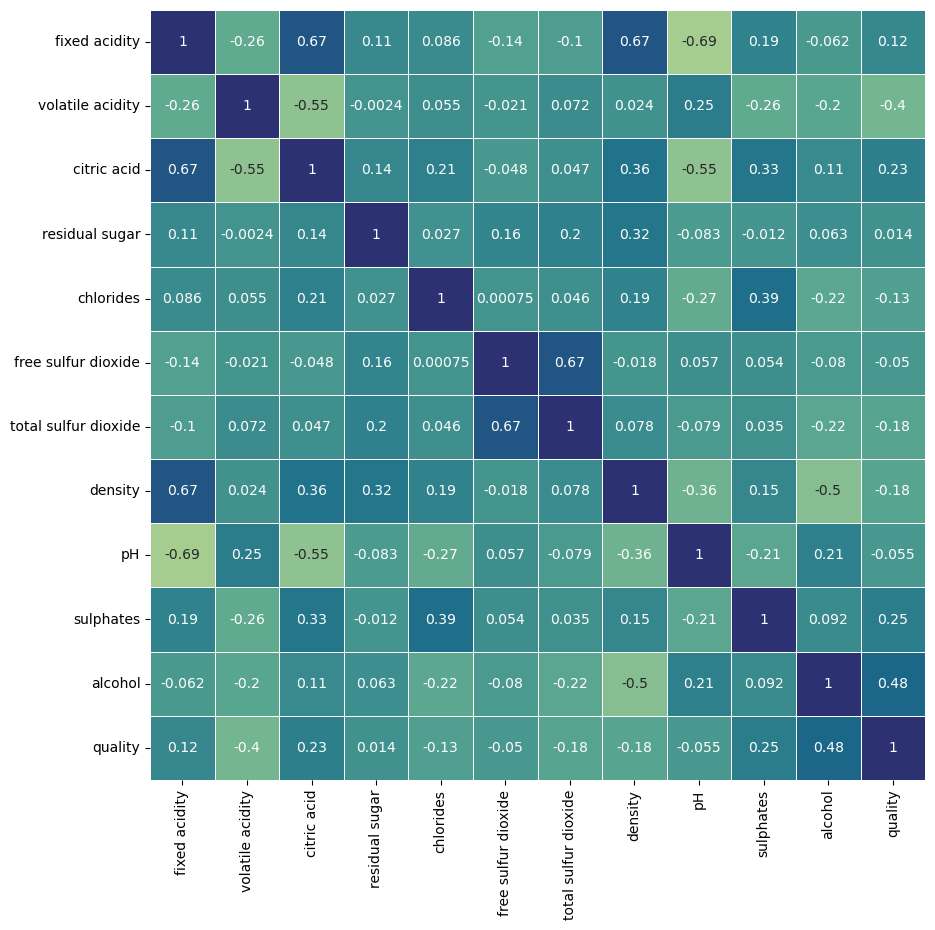

In [739]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.4,cbar=False,cmap='crest')

TASK 4-Removing Outliers

In [822]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-(1.5*iqr)
    high = q3+(1.5*iqr) 
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

TASK5-Feature Selection and Scaling

In [826]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
x = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [827]:
df['goodquality'].value_counts()

0    1175
1     184
Name: goodquality, dtype: int64

TASK6- Data Split

In [849]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=7 ) 

In [850]:
X_train.shape

(1087, 11)

In [851]:
X_test.shape

(272, 11)

TASK7-MODEL BUILDING

Logistic Regression

In [874]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))
print("Classification report",classification_report(Y_test,Y_pred))

Accuracy Score: 0.8933823529411765
Classification report               precision    recall  f1-score   support

           0       0.90      0.98      0.94       236
           1       0.73      0.31      0.43        36

    accuracy                           0.89       272
   macro avg       0.82      0.64      0.69       272
weighted avg       0.88      0.89      0.87       272



D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [886]:
pd.crosstab(Y_test,Y_pred)

col_0,0,1
goodquality,,
0,232,4
1,25,11


Decision Tree

In [875]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
print("Classification report",classification_report(Y_test,y_pred))

Accuracy Score: 0.8639705882352942
Classification report               precision    recall  f1-score   support

           0       0.92      0.92      0.92       236
           1       0.49      0.47      0.48        36

    accuracy                           0.86       272
   macro avg       0.70      0.70      0.70       272
weighted avg       0.86      0.86      0.86       272



In [887]:
pd.crosstab(Y_test,y_pred)

col_0,0,1
goodquality,,
0,218,18
1,19,17


Random Forest

In [876]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))
print("Classification report",classification_report(Y_test,y_pred2)) 

Accuracy Score: 0.8786764705882353
Classification report               precision    recall  f1-score   support

           0       0.89      0.97      0.93       236
           1       0.60      0.25      0.35        36

    accuracy                           0.88       272
   macro avg       0.75      0.61      0.64       272
weighted avg       0.86      0.88      0.86       272



In [888]:
pd.crosstab(Y_test,y_pred2)

col_0,0,1
goodquality,,
0,230,6
1,27,9


GaussianNB

In [871]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_pred3))
print("Classification report",classification_report(Y_test,Y_pred3)) 

Accuracy Score: 0.8860294117647058
Classification report               precision    recall  f1-score   support

           0       0.95      0.92      0.93       236
           1       0.56      0.69      0.62        36

    accuracy                           0.89       272
   macro avg       0.75      0.80      0.78       272
weighted avg       0.90      0.89      0.89       272



In [889]:
pd.crosstab(Y_test,Y_pred3)

col_0,0,1
goodquality,,
0,216,20
1,11,25


KNN

In [872]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred4 = model.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_pred4))
print("Classification report",classification_report(Y_test,Y_pred4))

Accuracy Score: 0.8639705882352942
Classification report               precision    recall  f1-score   support

           0       0.89      0.96      0.92       236
           1       0.47      0.25      0.33        36

    accuracy                           0.86       272
   macro avg       0.68      0.60      0.63       272
weighted avg       0.84      0.86      0.85       272



In [890]:
pd.crosstab(Y_test,Y_pred4)

col_0,0,1
goodquality,,
0,226,10
1,27,9


TASK8- Test with random observation

In [885]:
a=model.predict([[7.4,0.28,0.04,2.6,0.076,25,38,0.9978,3.51,0.67,9.4]])
print(a)

[0]


D:\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


From above machine Learning Models we conclude that Logistic and GaussianNB is more suitable for this data with 89% accuracy

THANK YOU